In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform
from matplotlib import rc
import matplotlib.font_manager as fm
import os, warnings
warnings.filterwarnings(action='ignore')

# 1) 2000년 - 2020년 시도별 평균 기온변화

In [3]:
temp = pd.read_csv('기온_시도__20210625001414.csv',encoding='euc-kr')
temp.columns=['Year','Region','AvgTemp']

si_do={'강원도':'Gangwon-do','경기도':'Gyeonggi-do', '경상남도':'Gyeongsangnam-do','경상북도':'Gyeongsangbuk-do',
       '광주광역시':'Gwangju','대구광역시':'Daegu','대전광역시':'Daejeon','부산광역시':'Busan',
       '서울특별시':'Seoul','세종특별자치시':'Sejongsi','울산광역시':'Ulsan','인천광역시':'Incheon',
       '전라남도':'Jeollanam-do','전라북도':'Jeollabuk-do','제주특별자치도':'Jeju-do','충청남도':'Chungcheongnam-do',
       '충청북도':'Chungcheongbuk-do','전국(평균)':'Average'}

temp['eng_region']=temp['Region'].apply(lambda x: si_do[x])

temp


,Year,Region,AvgTemp,eng_region
0,2000,전국(평균),12.5,Average
1,2000,서울특별시,12.7,Seoul
2,2000,부산광역시,14.9,Busan
3,2000,대구광역시,14.2,Daegu
4,2000,인천광역시,11.7,Incheon
...,...,...,...,...
353,2020,전라북도,13.0,Jeollabuk-do
354,2020,전라남도,14.1,Jeollanam-do
355,2020,경상북도,13.0,Gyeongsangbuk-do
356,2020,경상남도,14.1,Gyeongsangnam-do


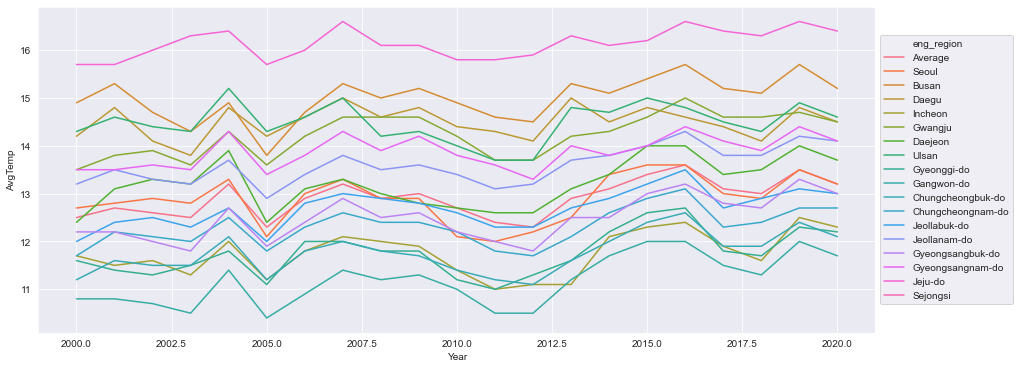

In [4]:
 
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax= sns.lineplot(x="Year", y="AvgTemp",hue="eng_region",data=temp)
#범례 표시 , bbox_to_anchor을 사용하여 legend가 그래프를 가려서 그래프 밖으로 이동
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

 * 대부분의 지역에서 10년동안 평균 기온이 올라간 것으로 확인 된다.

# 2) 시도별 기온 증가 폭 확인

In [121]:
temp_2000=temp[temp['Year']==2000] #year가 2000인 데이터 가지고 오기
temp_2020=temp[temp['Year']==2020] #year가 2020인 데이터 가지고 오기

#set_index 는 데이터프레임을 먼저 불러온 후에, 특정 열을 인덱스로 설정할때 사용
temp_2000.set_index('Region',inplace=True) #region을 인덱스로 사용
temp_2020.set_index('Region',inplace=True) #region을 인덱스로 사용

#concat : 데이터의 속성 형태가 동일한 데이터셋(homogeneously-typed objects)끼리 합칠 때 사용
tempconcat=pd.concat([temp_2000,temp_2020],axis=1) #axis=0,  # 0: 위+아래로 합치기, 1: 왼쪽+오른쪽으로 합치기
tempconcat.columns=['Year','2000_temp','eng_region','Year2','2020_temp','eng_region2']

tempconcat=tempconcat.drop(['Year2','eng_region2'],axis=1)

#2000년 대비 2020년 얼마나 올랐는지에 대한 column값 추가
tempconcat['temp_increase']=((tempconcat['2020_temp']/tempconcat['2000_temp'])-1)*100

tempconcat=tempconcat.sort_values(by='temp_increase',ascending=False)
tempconcat

,Year,2000_temp,eng_region,2020_temp,temp_increase
대전광역시,2000.0,12.4,Daejeon,13.7,10.483871
충청남도,2000.0,11.7,Chungcheongnam-do,12.7,8.547009
강원도,2000.0,10.8,Gangwon-do,11.7,8.333333
전라북도,2000.0,12.0,Jeollabuk-do,13.0,8.333333
충청북도,2000.0,11.2,Chungcheongbuk-do,12.1,8.035714
광주광역시,2000.0,13.5,Gwangju,14.5,7.407407
전라남도,2000.0,13.2,Jeollanam-do,14.1,6.818182
경상북도,2000.0,12.2,Gyeongsangbuk-do,13.0,6.557377
전국(평균),2000.0,12.5,Average,13.2,5.600000
경기도,2000.0,11.6,Gyeonggi-do,12.2,5.172414


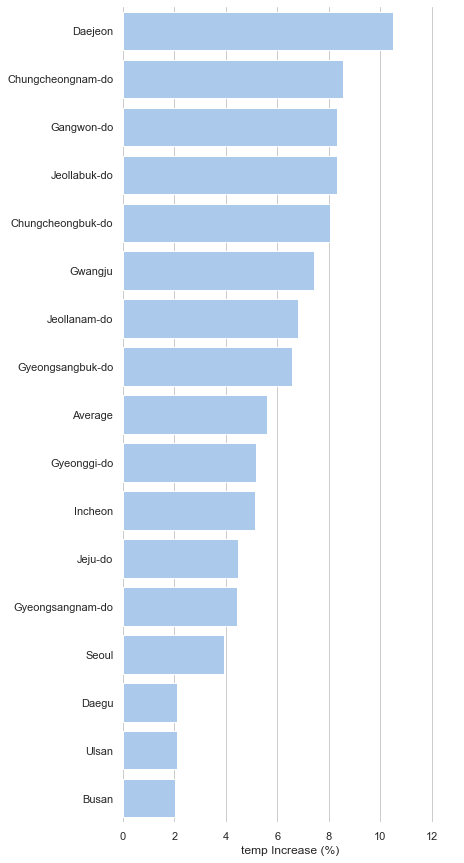

In [134]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="temp_increase", y="eng_region", data=tempconcat, color="b")

ax.set(xlim=(0, 13), ylabel="",
       xlabel="temp Increase (%)")
sns.despine(left=True, bottom=True)

대한민국 전체적으로 2000년 대비 2020년에 기온이 5.6% 증가한 것으로 나온다.  대전을 비롯한 충청도 지역이 기온이 지역 평균 이상으로 상승폭이 높은 것으로 나타나고 경상남도 지역의 울산. 부산 그리고 대구는 상승폭이 평균 이하로 낮게 나타난다. 

### 참고 
* https://landshire.tistory.com/52
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL9801&vw_cd=MT_GTITLE01&list_id=111&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01